# What is a Funnel?
In the world of marketing analysis, “funnel” is a word you will hear time and time again.

A funnel is a marketing model which illustrates the theoretical customer journey towards the purchase of a product or service. Oftentimes, we want to track how many users complete a series of steps and know which steps have the most number of users giving up.

Some examples include:

- Answering each part of a 5 question survey on customer satisfaction
- Clicking “Continue” on each step of a set of 5 onboarding modals
- Browsing a selection of products → Viewing a shopping cart → Making a purchase

Generally, we want to know the total number of users in each step of the funnel, as well as the percent of users who complete each step.

Throughout this lesson, we will be working with data from a fictional company called Mattresses and More. Using SQL, you can dive into complex funnels and event flow analysis to gain insights into their users’ behavior.

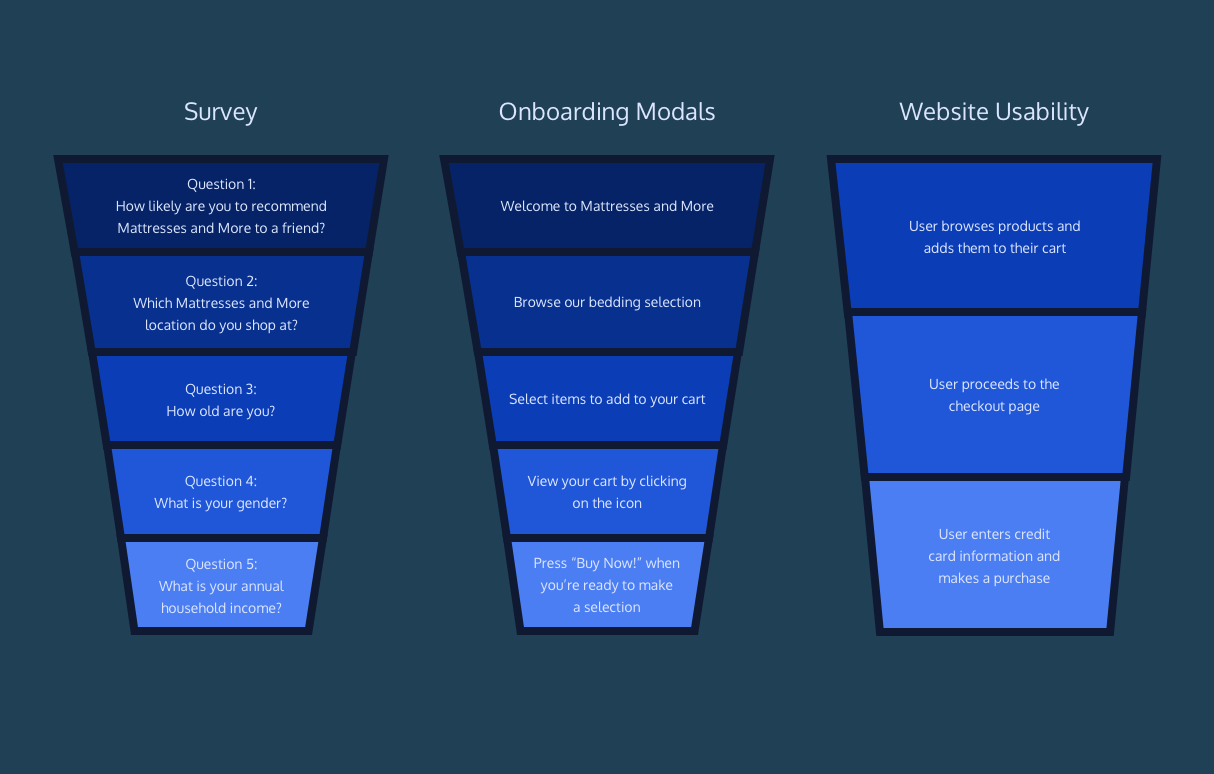

# Build a Funnel From a Single Table
Mattresses and More users were asked to answer a five-question survey:

1. “How likely are you to recommend Mattresses and More to a friend?”
2. “Which Mattresses and More location do you shop at?”
3. “How old are you?”
4. “What is your gender?”
5. “What is your annual household income?”


However, not every user finished the survey!

We want to build a funnel to analyze if certain questions prompted users to stop working on the survey.

We will be using a table called `survey_responses` with the following columns:

- `question_text` - the survey question
- `user_id` - the user identifier
- `response` - the user answer

### Example problem:
Let’s build our first basic funnel!

Count the number of distinct `user_id` who answered each `question_text`.

You can do this by using a simple `GROUP BY` command.

What is the number of responses for each question?


> `SELECT question_text,
   COUNT(DISTINCT user_id)
FROM survey_responses
GROUP BY question_text;`

# Survey Result
We could use SQL to calculate the percent change between each question, but it’s just as easy to analyze these manually with a calculator or in a spreadsheet program like Microsoft Excel or Google Sheets.

If we divide the number of people completing each step by the number of people completing the previous step:

| Question | Percent Completed this Question |
| ------- | -----------------|
| 1	| 100%
| 2	| 95%
| 3	| 82%
| 4	| 95%
| 5	| 74%

We see that Questions 2 and 4 have high completion rates, but Questions 3 and 5 have lower rates.

This suggests that age and household income are more sensitive questions that people might be reluctant to answer!

# Compare Funnels For A/B Tests
Mattresses and More has an onboarding workflow for new users of their website. It uses modal pop-ups to welcome users and show them important features of the site like:

1. Welcome to Mattresses and More!
2. Browse our bedding selection
3. Select items to add to your cart
4. View your cart by clicking on the icon
5. Press ‘Buy Now!’ when you’re ready to checkout

The Product team at Mattresses and More has created a new design for the pop-ups that they believe will lead more users to complete the workflow.

They’ve set up an A/B test where:

- 50% of users view the original `control` version of the pop-ups
- 50% of users view the new `variant` version of the pop-ups

Eventually, we’ll want to answer the question:

*How is the funnel different between the two groups?*

We will be using a table called `nboarding_modals` with the following columns:

- `user_id` - the user identifier
- `modal_text` - the modal step
- `user_action` - the user response (Close Modal or Continue)
- `ab_group` - the version (control or variant)

### Example problems:
Using `GROUP BY`, count the number of distinct `user_id`‘s for each value of `modal_text`. This will tell us the number of users completing each step of the funnel.

This time, sort `modal_text` so that your funnel is in order.

> `SELECT modal_text, COUNT(DISTINCT user_id)
 FROM onboarding_modals
 GROUP BY modal_text
 ORDER BY modal_text;`
 
 
The previous query combined both the control and variant groups.

We can use a `CASE` statement within our `COUNT()` aggregate so that we only count `user_id`s whose `ab_group` is equal to ‘control’:

> `SELECT modal_text, COUNT(DISTINCT CASE
    WHEN ab_group = 'control' THEN user_id
    END) AS 'control_clicks'
FROM onboarding_modals
GROUP BY 1
ORDER BY 1;`


Add an additional column to your previous query that counts the number of clicks from the variant group and alias it as ‘variant_clicks’.

> `SELECT modal_text,
  COUNT(DISTINCT CASE
    WHEN ab_group = 'control' THEN user_id
    END) AS 'control_clicks', 
  COUNT(DISTINCT CASE
    WHEN ab_group = 'variant' THEN user_id
    END) AS 'variant_clicks'
FROM onboarding_modals
GROUP BY 1
ORDER BY 1;`

# A/B Tests Results
Incredible! After some quick math:

| Modal	| Control Percent |	Variant Percent |
| ----- | --------------- | --------------|
| 1	| 100%  | 100%
| 2	| 60%	| 79%
| 3	| 80%	| 85%
| 4	| 80%	| 80%
| 5	| 85%	| 85%

- During Modal 2, `variant` has a 79% completion rate compared to `control`‘s 60%
- During Modal 3, `variant` has a 85% completion rate compared to `control`‘s 80%
- All other steps have the same level of completion

This result tells us that the `variant` has greater completion!

# Build a Funnel from Multiple Tables 1
Scenario: Mattresses and More sells bedding essentials from their e-commerce store. Their purchase funnel is:

1. The user browses products and adds them to their cart
2. The user proceeds to the checkout page
3. The user enters credit card information and makes a purchase

Three steps! Simple and easy.

As a sales analyst, you want to examine data from the shopping days before Christmas. As Christmas approaches, you suspect that customers become more likely to purchase items in their cart (i.e., they move from window shopping to buying presents).

The data for Mattresses and More is spread across several tables:

- `browse` - each row in this table represents an item that a user has added to his shopping cart
- `checkout` - each row in this table represents an item in a cart that has been checked out
- `purchase` - each row in this table represents an item that has been purchased


# Build a Funnel from Multiple Tables 2
First, we want to combine the information from the three tables (`browse`, `checkout`, `purchase`) into one table with the following schema:

| browser_date| user_id	| is_checkout |	is_purchase
| ----------- | ------- | ----------- | ----------- |
| 2017-12-20	| 6a7617321513 |	True	| False
| 2017-12-20	| 022d871cdcde |	False	 |False
| … |	… |	… |	…

Each row will represent a single user:

- If the user has any entries in `checkout`, then `is_checkout` will be True.
- If the user has any entries in `purchase`, then `is_purchase` will be True.

If we use an `INNER JOIN` to create this table, we’ll lose information from any customer who does not have a row in the `checkout` or `purchase` table.

Therefore, we’ll need to use a series of `LEFT JOIN` commands.

### Example problems:
Start by selecting all rows (`*`) from the `LEFT JOIN` of:

- `browse` (aliased as `b`)
- `checkout` (aliased as `c`)
- `purchase` (aliased as `p`)

Be sure to use this order to make sure that we get all of the rows.

`LIMIT` your results to the first 50 so that it loads quickly.

> `SELECT *
FROM browse AS b
LEFT JOIN checkout AS c 
  ON c.user_id = b.user_id
LEFT JOIN purchase AS p
  ON p.user_id = b.user_id
LIMIT 50;`

But we don’t want all of these columns in the result!

Instead of selecting all columns using `*`, let’s select these four:

- `DISTINCT b.browse_date`
- `b.user_id`
- `c.user_id IS NOT NULL AS 'is_checkout'`
- `p.user_id IS NOT NULL AS 'is_purchase'`

Edit your query so that you select these columns.

> `SELECT DISTINCT b.browse_date, 
  b.user_id, 
  c.user_id IS NOT NULL AS 'is_checkout', 
  p.user_id IS NOT NULL AS 'is_purchase'
FROM browse AS b
LEFT JOIN checkout AS c 
  ON c.user_id = b.user_id
LEFT JOIN purchase AS p
  ON p.user_id = b.user_id
LIMIT 50;`

# Build a Funnel from Multiple Tables 3
We’ve created a new table that combined all of our data:

| browser_date	| user_id	| is_checkout	| is_purchase
| ------------ | --------| ---------- | -------- |
| 2017-12-20	| 6a7617321513	| 1	| 0
| 2017-12-20	| 022d871cdcde	| 0	| 0
| …	| …	| …	| …

Here, `1` represents True and `0` represents False.

Once we have the data in this format, we can analyze it in several ways.

Let’s put the whole thing in a `WITH` statement so that we can continue on building our query.

We will give the temporary table the name `funnels`:

`WITH funnels AS (
  SELECT DISTINCT b.browse_date,
     b.user_id,
     c.user_id IS NOT NULL AS 'is_checkout',
     p.user_id IS NOT NULL AS 'is_purchase'
  FROM browse AS 'b'
  LEFT JOIN checkout AS 'c'
    ON c.user_id = b.user_id
  LEFT JOIN purchase AS 'p'
    ON p.user_id = c.user_id)
SELECT ______
_____________
_____________;`

Notice how the whole previous query is put inside the parentheses `( )`.

Let’s query from this `funnels` table and calculate overall conversion rates.

### Example problems:
First, add a column that counts the total number of rows in `funnels`.

Alias this column as ‘num_browse’.

This is the number of users in the “browse” step of the funnel.

> `WITH funnels AS (
  SELECT DISTINCT b.browse_date,
     b.user_id,
     c.user_id IS NOT NULL AS 'is_checkout',
     p.user_id IS NOT NULL AS 'is_purchase'
  FROM browse AS 'b'
  LEFT JOIN checkout AS 'c'
    ON c.user_id = b.user_id
  LEFT JOIN purchase AS 'p'
    ON p.user_id = c.user_id)
SELECT COUNT(*) AS 'num_browse'
FROM funnels;`

Second, add another column that sums the `is_checkout` in `funnels`.

Alias this column as ‘num_checkout’.

This is the number of users in the “checkout” step of the funnel.

> `WITH funnels AS (
  SELECT DISTINCT b.browse_date,
     b.user_id,
     c.user_id IS NOT NULL AS 'is_checkout',
     p.user_id IS NOT NULL AS 'is_purchase'
  FROM browse AS 'b'
  LEFT JOIN checkout AS 'c'
    ON c.user_id = b.user_id
  LEFT JOIN purchase AS 'p'
    ON p.user_id = c.user_id)
SELECT COUNT(*) AS 'num_browse', 
  SUM (is_checkout) AS 'num_checkout'
FROM funnels;`

Third, add another column that sums the `is_purchase` column in `funnels`.

Alias this column as ‘num_purchase’.

This is the number of users in the “purchase” step of the funnel.

> `WITH funnels AS (
  SELECT DISTINCT b.browse_date,
     b.user_id,
     c.user_id IS NOT NULL AS 'is_checkout',
     p.user_id IS NOT NULL AS 'is_purchase'
  FROM browse AS 'b'
  LEFT JOIN checkout AS 'c'
    ON c.user_id = b.user_id
  LEFT JOIN purchase AS 'p'
    ON p.user_id = c.user_id)
SELECT COUNT(*) AS 'num_browse', 
  SUM (is_checkout) AS 'num_checkout', 
  SUM (is_purchase) AS 'num_purchase'
FROM funnels;`

Finally, let’s do add some more calculations to make the results more in depth.

Let’s add these two columns:

- Percentage of users from browse to checkout
- Percentage of users from checkout to purchase

`1.0 * SUM(is_checkout) / COUNT(user_id),
1.0 * SUM(is_purchase) / SUM(is_checkout)`

You can also give these columns aliases for more readability.

> `WITH funnels AS (
  SELECT DISTINCT b.browse_date,
     b.user_id,
     c.user_id IS NOT NULL AS 'is_checkout',
     p.user_id IS NOT NULL AS 'is_purchase'
  FROM browse AS 'b'
  LEFT JOIN checkout AS 'c'
    ON c.user_id = b.user_id
  LEFT JOIN purchase AS 'p'
    ON p.user_id = c.user_id)
SELECT COUNT(*) AS 'num_browse', 
  SUM (is_checkout) AS 'num_checkout', 
  SUM (is_purchase) AS 'num_purchase', 
  1.0 * SUM(is_checkout) / COUNT(user_id) AS 'browse_to_chckout_pct',
1.0 * SUM(is_purchase) / SUM(is_checkout) AS 'chckout_to_purchase_pct'
FROM funnels;`


# Build a Funnel from Multiple Tables 4
So, we’ve created a funnel for Mattresses and More’s purchase process!

The management team suspects that conversion from checkout to purchase changes as the `browse_date` gets closer to Christmas Day.

We can make a few edits to this code to calculate the funnel for each `browse_date` using `GROUP BY`.

### Example problems:
Edit the code so that the first column in the result is `browse_date`.

Then, use `GROUP BY` so that we calculate `num_browse`, `num_checkout`, and `num_purchase` for each `browse_date`.

Also be sure to `ORDER BY` `browse_date`.

> `WITH funnels AS (
  SELECT DISTINCT b.browse_date,
     b.user_id,
     c.user_id IS NOT NULL AS 'is_checkout',
     p.user_id IS NOT NULL AS 'is_purchase'
  FROM browse AS 'b'
  LEFT JOIN checkout AS 'c'
    ON c.user_id = b.user_id
  LEFT JOIN purchase AS 'p'
    ON p.user_id = c.user_id)
SELECT browse_date, 
  COUNT(*) AS 'num_browse',
   SUM(is_checkout) AS 'num_checkout',
   SUM(is_purchase) AS 'num_purchase',
   1.0 * SUM(is_checkout) / COUNT(user_id) AS 'browse_to_checkout',
   1.0 * SUM(is_purchase) / SUM(is_checkout) AS 'checkout_to_purchase'
FROM funnels
GROUP BY browse_date
ORDER BY browse_date;`

result below:

In [3]:
import pandas as pd

pd.read_clipboard()

,browse_date,num_browse,num_checkout,num_purchase,browse_to_checkout,checkout_to_purchase
0,2017-12-20,100,20,16,0.200000,0.800000
1,2017-12-21,150,33,28,0.220000,0.848485
2,2017-12-22,250,62,55,0.248000,0.887097
3,2017-12-23,275,68,64,0.247273,0.941176
